# [Lab Session 4](deconvolution.ipynb)

In [97]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.restoration import wiener
from scipy.signal import convolve2d as conv
from scipy.stats import multivariate_normal as multi_normal

np.random.seed(0)

Load the image.

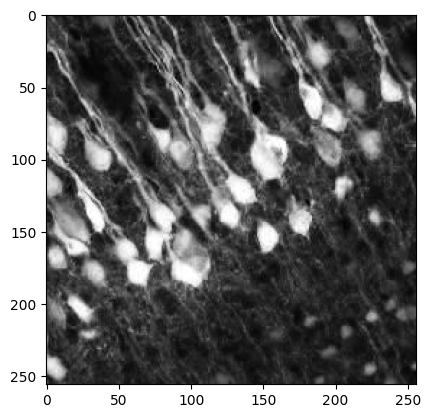

In [98]:
img = plt.imread('data/cells.png')[128:384, 128:384]
plt.imshow(img, 'gray')

**[Task 1.]()** Apply the following PSF to the image and then display it.

In [99]:
psf_size = 10
psf = np.ones((psf_size, psf_size)) / psf_size ** 2

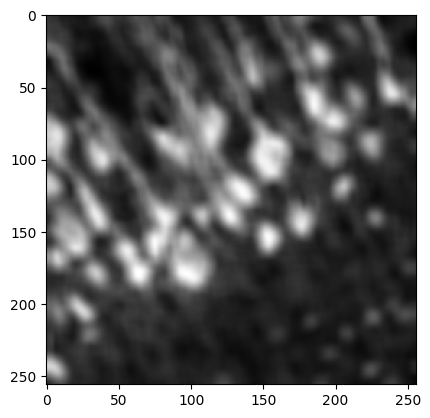

In [100]:
img_conv = conv(img, psf, mode="same", boundary="symm")
plt.imshow(img_conv, 'gray')

**[Task 2.]()** Have a look at the Gaussian PSF which is not uniformly distributed. Apply it to the image.

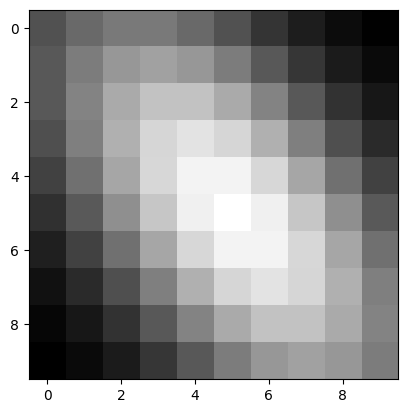

In [101]:
def create_psf(size):
    factor = size * 1.8
    x, y = np.mgrid[0:size:1, 0:size:1]
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x
    pos[:, :, 1] = y
    rv = multi_normal([int(size / 2), (int(size / 2))], [[factor * 1., factor * 1.2], [factor * .5, factor * .7]])
    return rv.pdf(pos)

plt.imshow(create_psf(psf_size), 'gray')


Apply the second psf to the image:

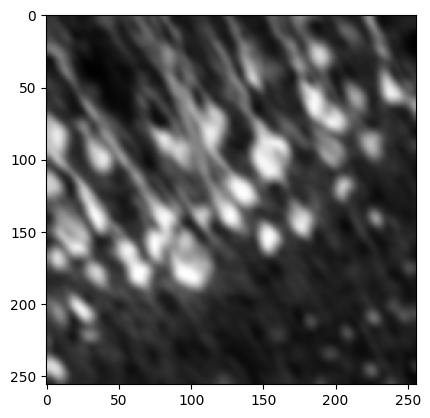

In [102]:
psf_gaussian = create_psf(psf_size)
img_conv2 = conv(img, psf_gaussian, mode="same", boundary="symm")
plt.imshow(img_conv2, 'gray')

**[Task 3.]()** Implement a reusable function that performs the Richardson-Lucy deconvolution.

In [103]:
def richardson_lucy_deconvolution(image, psf, n_iterations):
    img_deconv = np.full(image.shape, 0.5)
    
    psf_flipped = np.flip(psf)

    for x in range(n_iterations): 
        conv_hp = conv(img_deconv, psf, mode="same", boundary = "symm")
        Bruch = image / conv_hp 
        conv_ghpp = conv(Bruch, psf_flipped, mode="same", boundary = "symm") 
        img_deconv = img_deconv * conv_ghpp
    
    img_deconv = img_deconv.clip(0,1)
    return img_deconv

**[Task 4.]()** Apply the Richardson-Lucy deconvolution to the blurred image.

In [104]:
deconv_img = richardson_lucy_deconvolution(img_conv, psf, 60)

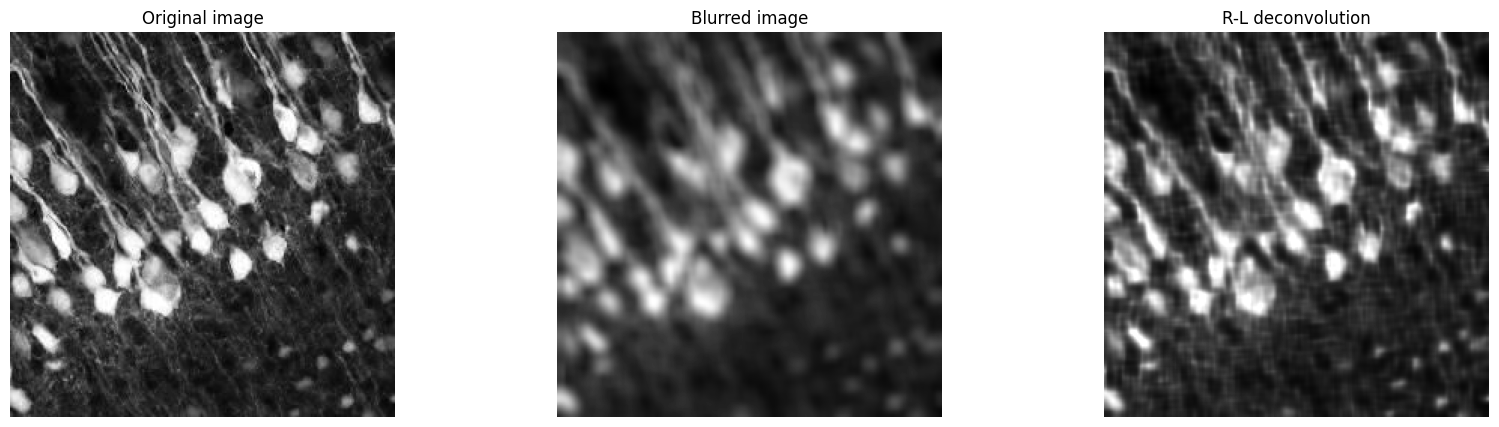

In [105]:
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(img, 'gray')
plt.title('Original image')
plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(img_conv, 'gray')
plt.title('Blurred image')
plt.subplot(1, 3, 3)
plt.axis('off')
plt.imshow(deconv_img, 'gray')
plt.title('R-L deconvolution')
plt.show()

**[Task 5.]()** Add noise to the image, use the R-L deconvolution again.

In [110]:
noise = (np.random.normal(loc=0,size=img.shape))
reduce_factor = 5
noise = noise / reduce_factor

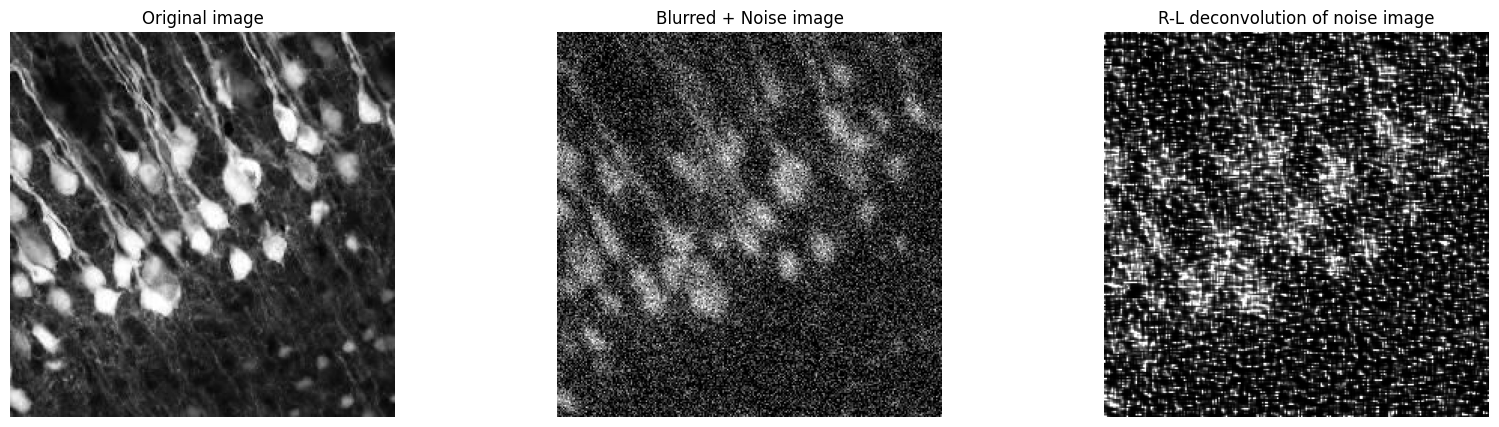

In [113]:
img_noisy = img_conv2 + noise
img_noisy = img_noisy.clip(0, 1)

img_deconv_noisy = richardson_lucy_deconvolution(img_noisy, psf_gaussian, 60)

plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(img, 'gray')
plt.title('Original image')
plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(img_noisy, 'gray')
plt.title('Blurred + Noise image')
plt.subplot(1, 3, 3)
plt.axis('off')
plt.imshow(img_deconv_noisy, 'gray')
plt.title('R-L deconvolution of noise image')
plt.show()

**[Task 6.]()** Compare your R-L implementation to a wiener deconvolution.

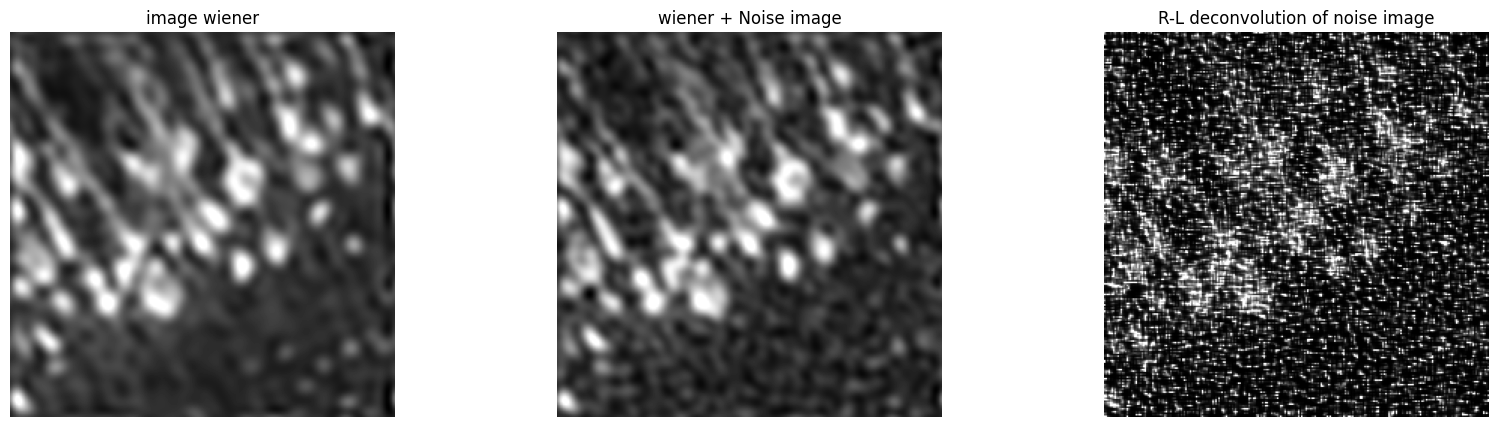

In [114]:
img_wiener = wiener(img_conv, psf, balance = 2, clip = True)
img_wiener_noise = wiener(img_noisy, psf_gaussian, balance = 2, clip = True)

plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(img_wiener, 'gray')
plt.title('image wiener')
plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(img_wiener_noise, 'gray')
plt.title('wiener + Noise image')
plt.subplot(1, 3, 3)
plt.axis('off')
plt.imshow(img_deconv_noisy, 'gray')
plt.title('R-L deconvolution of noise image')
plt.show()

**[Task 7.]()** Repeat Tasks 4–6 using a smaller value for the size of the PSF.

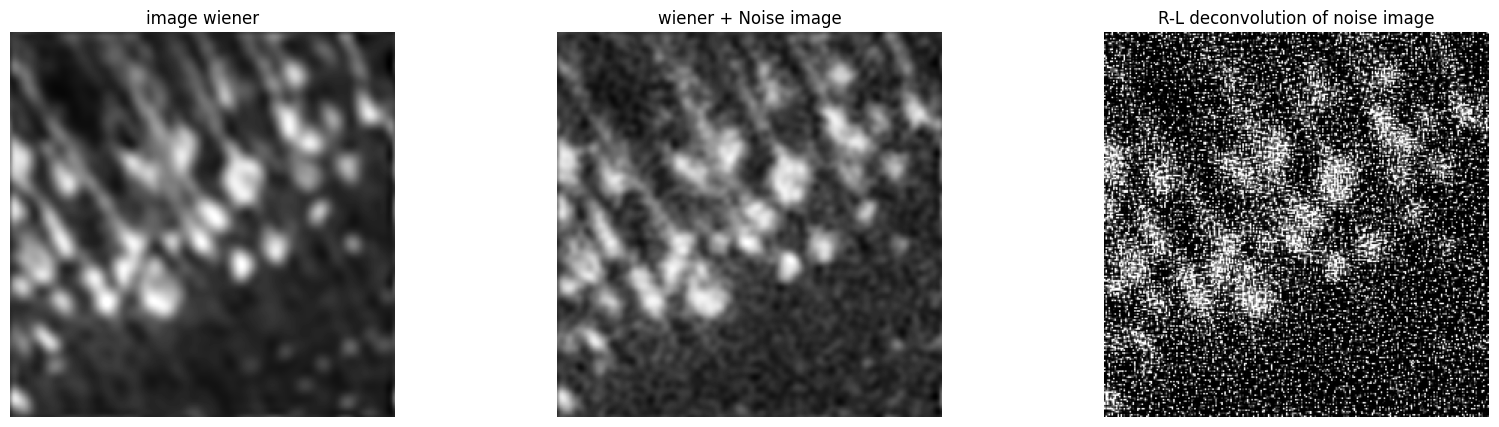

In [109]:
psf_size2 = 5
psf2 = np.ones((psf_size2, psf_size2)) / psf_size2 ** 2

deconv_img2 = richardson_lucy_deconvolution(img_conv, psf2, 60)

img_deconv_noisy2 = richardson_lucy_deconvolution(img_noisy, psf2, 60)

img_wiener2 = wiener(img_conv, psf2, balance = 2, clip = True)
img_wiener_noise2 = wiener(img_noisy, psf2, balance = 2, clip = True)


plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.axis('off')
plt.imshow(img_wiener2, 'gray')
plt.title('image wiener')
plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(img_wiener_noise2, 'gray')
plt.title('wiener + Noise image')
plt.subplot(1, 3, 3)
plt.axis('off')
plt.imshow(img_deconv_noisy2, 'gray')
plt.title('R-L deconvolution of noise image')
plt.show()

**[Task 8.]()** Use a wrong PSF to restore the image

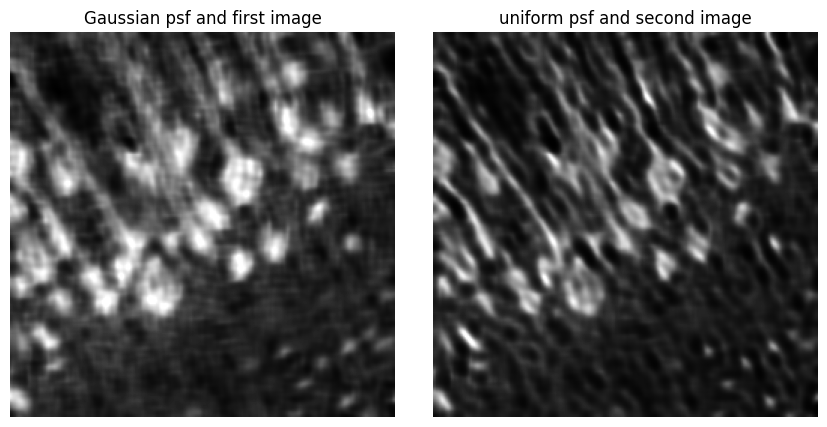

In [115]:
wrong1 =  richardson_lucy_deconvolution(img_conv, psf_gaussian, 60)
wrong2 = richardson_lucy_deconvolution(img_conv2, psf, 60)

plt.figure(figsize=(20,5))
plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(wrong1, 'gray')
plt.title('Gaussian psf and first image')
plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(wrong2, 'gray')
plt.title('uniform psf and second image')
plt.show()